###**TITANIC DATA ANALYSIS**

**Setting up the Environment**

In [1]:
#importing necessary Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset into a Pandas DataFrame
df=pd.read_csv('titanic_data.csv')
#Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Data Types and Structures**

In [3]:
#Display the data types of each column in the DataFrame
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#Display descriptive statistics for numerical columns in the DataFrame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Handling missing data and duplicate values**

In [5]:
#Handling Missing Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
for i in df.columns:
  if df[i].dtypes=='object':
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [7]:
#Dealing with Duplicates
df.duplicated().sum()

0

**Filtering data on a condition**

In [9]:
#Filtering data based on a condition
survived=df[df['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
6,898,1,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,B57 B59 B63 B66,Q
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,B57 B59 B63 B66,C
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00000,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,B57 B59 B63 B66,S
410,1302,1,3,"Naughton, Miss. Hannah",female,30.27259,0,0,365237,7.7500,B57 B59 B63 B66,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00000,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.7750,B57 B59 B63 B66,S


In [10]:
#Sorting the data frame by a specific column
df.sort_values(by='Age',ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,B57 B59 B63 B66,S
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,B57 B59 B63 B66,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,B57 B59 B63 B66,S
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,B57 B59 B63 B66,S
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
305,1197,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.00,1,1,112901,26.5500,B26,S
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.00,0,2,PC 17756,83.1583,E45,C
236,1128,0,1,"Warren, Mr. Frank Manley",male,64.00,1,0,110813,75.2500,D37,C
81,973,0,1,"Straus, Mr. Isidor",male,67.00,1,0,PC 17483,221.7792,C55 C57,S


In [14]:
#Group data based on a column
df.groupby(by='Pclass')['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


In [24]:
#Add a new column to the DataFrame
df['Average']=df.groupby(by='Pclass')['Survived'].transform('mean')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Average
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,0.330275
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,0.330275
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,0.322581
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,0.330275
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,0.330275


In [15]:
df['Family_Size'] =df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,3


In [16]:
#Replace non-numerical values in (specific) column.
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,3


In [17]:
#Mapping values to numerical values
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
#replace values in the column.
df['Embarked']=df['Embarked'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,B57 B59 B63 B66,2,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,B57 B59 B63 B66,0,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,B57 B59 B63 B66,2,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,B57 B59 B63 B66,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,0,3


###**Statistical Analysis**

In [27]:
# Displaying the Descriptive Statistics for our dataset
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Average
count,418.000000,418.000000,418.000000,0.0,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,NaN,29.599282,0.447368,0.392344,35.576535,0.363636
std,120.810458,0.481622,0.841838,NaN,12.703770,0.896760,0.981429,55.850103,0.060948
min,892.000000,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,0.322581
25%,996.250000,0.000000,1.000000,NaN,23.000000,0.000000,0.000000,7.895800,0.330275
50%,1100.500000,0.000000,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,0.330275
75%,1204.750000,1.000000,3.000000,NaN,35.750000,1.000000,0.000000,31.471875,0.467290
max,1309.000000,1.000000,3.000000,NaN,76.000000,8.000000,9.000000,512.329200,0.467290


In [20]:
#inferential statistics
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age'])
print('T-statistics:',t_stat)
print('P-Value:',p_value)
if p_value<0.05:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

T-statistics: -0.00023290666704242133
P-Value: 0.9998142790125495
Accept null hypothesis


In [21]:
from scipy.stats import ttest_ind
male_survived=df[df['Sex']==0]['Survived']
female_survived=df[df['Sex']==1]['Survived']
t_stat,p_value=ttest_ind(male_survived,female_survived)
print('T-statistics:',t_stat)
print('P-Value:',p_value)
if p_value<0.05:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')

T-statistics: -inf
P-Value: 0.0
Reject null hypothesis


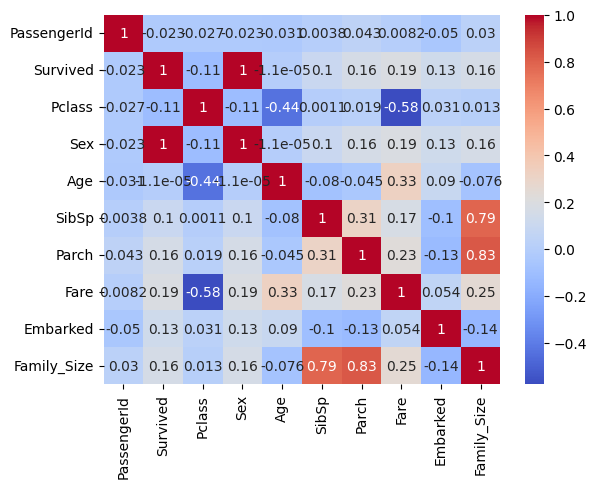

In [24]:
#Correlation Analysis
numerical_df = df.select_dtypes(include=['float', 'int'])
# Correlation matrix
corr_matrix=numerical_df.corr()
# heatmap of the correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

###**Data Visualization**

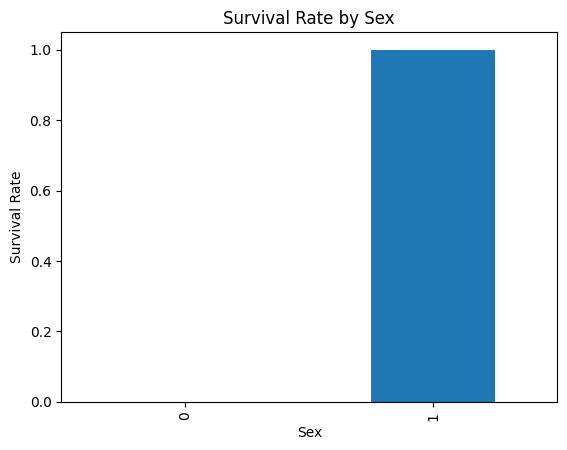

In [28]:
#Visualize the survival rate by sex
sex_survived=df.groupby(by='Sex')['Survived'].mean()
sex_survived.plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

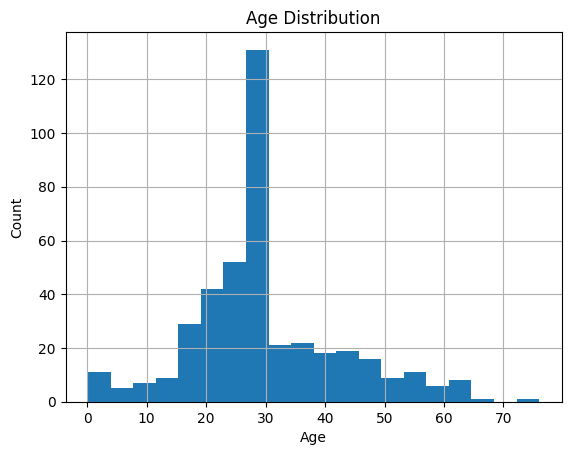

In [29]:
#Visualize the distribution of age
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

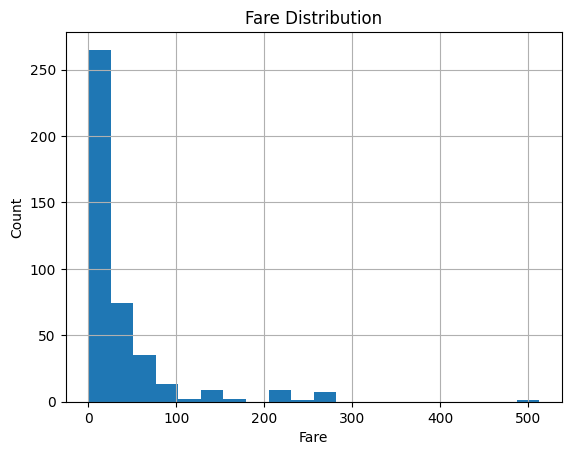

In [30]:
#Visualize the distribution of fare
df['Fare'].hist(bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()